In [12]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

data_dictionary = pd.read_csv('Data_Extract_From_World_Development_Indicators/6c06842a-443e-4f05-982a-8cd49bcb3c7d_Series - Metadata.csv')
data_dictionary[['Indicator Name', 'Long definition', 'Source']].dropna().style


,Indicator Name,Long definition,Source
0,GDP (current US$),"GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. Dollar figures for GDP are converted from domestic currencies using single year official exchange rates. For a few countries where the official exchange rate does not reflect the rate effectively applied to actual foreign exchange transactions, an alternative conversion factor is used.","World Bank national accounts data, and OECD National Accounts data files."
1,GDP growth (annual %),"Annual percentage growth rate of GDP at market prices based on constant local currency. Aggregates are based on constant 2015 prices, expressed in U.S. dollars. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources.","World Bank national accounts data, and OECD National Accounts data files."
2,"GDP, PPP (current international $)","This indicator provides values for gross domestic product (GDP) expressed in current international dollars, converted by purchasing power parity (PPP) conversion factor. GDP is the sum of gross value added by all resident producers in the country plus any product taxes and minus any subsidies not included in the value of the products. PPP conversion factor is a spatial price deflator and currency converter that eliminates the effects of the differences in price levels between countries. From April 2020, “GDP: linked series (current LCU)” [NY.GDP.MKTP.CN.AD] is used as underlying GDP in local currency unit so that it’s in line with time series of PPP conversion factors for GDP, which are extrapolated with linked GDP deflators.","International Comparison Program, World Bank | World Development Indicators database, World Bank | Eurostat-OECD PPP Programme."


In [13]:
df = pd.read_csv('Data_Extract_From_World_Development_Indicators/6c06842a-443e-4f05-982a-8cd49bcb3c7d_Data.csv').dropna()\
    .drop(columns=['Country Code']).rename(columns={'Country Name': 'country'})
num_cols = ['gdp_nom', 'gdp_growth', 'gdp_ppp']

df = df.melt(id_vars = 'country')

df['year'] = df.variable.apply(lambda e: e[:4]).astype(int)
df.variable = df.variable.str.replace('.*GDP \(current US\$\).*', 'gdp_nom', regex=True)\
    .str.replace('.*GDP, PPP.*', 'gdp_ppp', regex=True)\
    .str.replace('.*GDP growth.*', 'gdp_growth', regex=True)

df = df.pivot(['country', 'year'], 'variable', 'value').reset_index()
brics_lst = ['Brazil','China','India','Russian Federation','South Africa']
nato_lst = ['Albania','Belgium','Bulgaria','Canada','Croatia','Czech Republic','Denmark','Estonia','France','Germany','Greece','Hungary','Iceland','Italy','Latvia','Lithuania','Luxembourg','Montenegro','Netherlands','North Macedonia','Norway','Poland','Portugal','Romania','Slovak Republic','Slovenia','Spain','Turkey','United Kingdom','United States']
df = df[(
    (df.year >= 2000)
    & (df.country.isin(brics_lst + nato_lst))
)].sort_values('year').reset_index(drop=True)
df[num_cols] = df[num_cols].astype(float)

brics = df[df.country.isin(brics_lst)]
brics = brics.groupby('year').agg({
    'gdp_nom': sum,
    'gdp_ppp': sum
})

nato = df[df.country.isin(nato_lst)]
nato = nato.groupby('year').agg({
    'gdp_nom': sum,
    'gdp_ppp': sum
})

df = brics.join(nato, lsuffix='_brics', rsuffix='_nato').reset_index()

df = df.melt(id_vars = ['year'])

df.variable = df.variable.str.rsplit('_', n=1)
df['Bloc'] = df.variable.apply(lambda e: e[1]).str.upper()
df.variable = df.variable.apply(lambda e: e[0])

df = df.pivot(['Bloc', 'year'], 'variable', 'value').sort_values('Bloc', ascending=False).reset_index()

df


variable,Bloc,year,gdp_nom,gdp_ppp
0,NATO,2000,1.968282e+13,2.222680e+13
1,NATO,2001,2.005274e+13,2.312956e+13
2,NATO,2003,2.393897e+13,2.496771e+13
3,NATO,2004,2.666439e+13,2.649521e+13
4,NATO,2005,2.836051e+13,2.798876e+13
5,NATO,2006,3.025936e+13,3.010154e+13
6,NATO,2007,3.342842e+13,3.177427e+13
7,NATO,2008,3.517964e+13,3.294642e+13
8,NATO,2009,3.267738e+13,3.228171e+13
9,NATO,2010,3.349760e+13,3.359422e+13


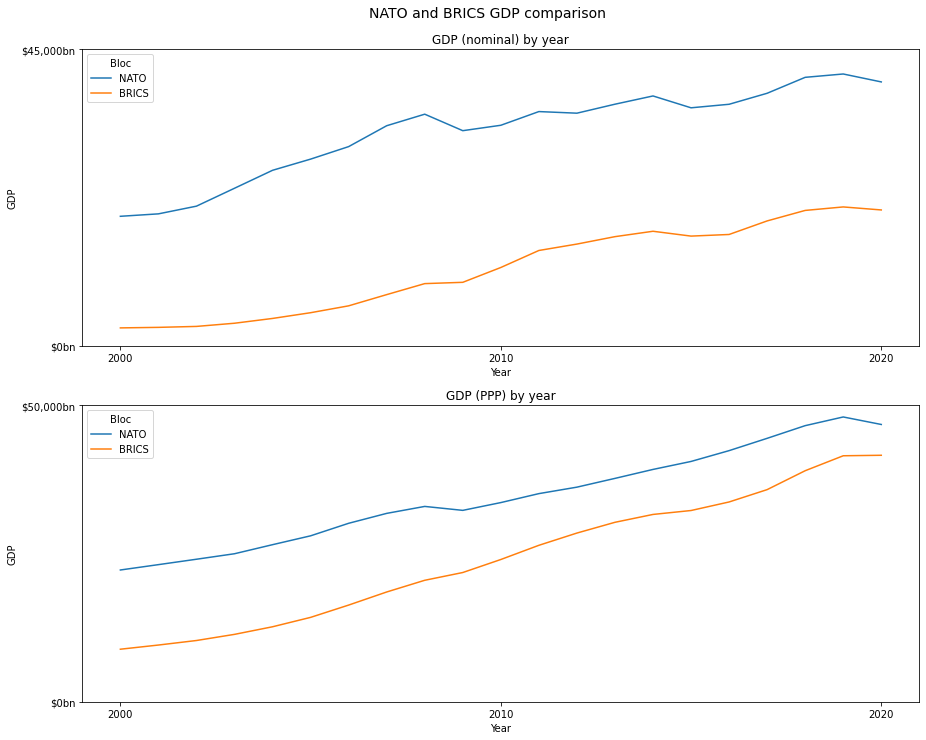

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
titles = {
    'gdp_nom': 'GDP (nominal)',
    'gdp_ppp': 'GDP (PPP)',

}

fig.suptitle('NATO and BRICS GDP comparison', y=0.93, fontsize=14)
for i, e in enumerate(['gdp_nom', 'gdp_ppp']):
    ax = axes[i]
    sns.lineplot(x='year', y=e, hue='Bloc', data=df, ax=ax)
    ax.set_title(f'{titles[e]} by year')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP')
    ax.set_xticks([2000, 2010, 2020])
    ax.set_ylim(0)
    yticks = ax.get_yticks()
    yticks = [yticks[0], yticks[-1]]
    ax.set_yticks(yticks)
    yticks = [f'${e/1_000_000_000:,.0f}bn' for e in yticks]
    ax.set_yticklabels(yticks)

plt.savefig(
    'GDP comparison.png', dpi=600, format='png', bbox_inches='tight', 
    pad_inches=0.5, facecolor='white', edgecolor='white'
)
    
plt.show()
    